In [0]:
 # 1) Dependencies

In [0]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import keras
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense,Conv2D, BatchNormalization,MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.applications import InceptionV3
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from keras import regularizers
from scipy.ndimage import imread
import cv2

Using TensorFlow backend.


# 2) Defining the architecture

In [0]:
input_shape = (224, 224, 3)

num_labels = 2

base_model = InceptionV3(include_top=False, input_shape=input_shape ,pooling = 'avg')
i = 0
for layer in base_model.layers:
    if i % 10 == 5:
       layer.trainable = True
    i+=1    

model = Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu",kernel_regularizer=regularizers.l2(0.02)))
model.add(Dense(num_labels, activation = 'softmax',kernel_regularizer=regularizers.l2(0.02)))
model.add(Dense(1, activation = 'relu'))


model.summary()    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 22,065,317
Trainable params: 22,030,885
Non-trainable params: 34,432
_________________________________________________________________


# 3) Loading the weights

In [0]:
# Path should be changed to your own path
path = "C:/Users/sabba/OneDrive/Bureau/Challenge IMA 205/final notebooks/CNN/weights"
model.load_weights(path + "/best_incep.hdf5")

# 4) Predicting

In [0]:

#from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# To only get 0 or 1 as final results 
def binarize(L):
  S= np.zeros(len(L))
  for i in range(len(L)):
    if L[i]>0.5:
      S[i] = 1
  return S


train = pd.read_csv("train.csv")
train.set_index('ImageId', inplace=True)


# test_folder_path: the folder where the images to predict are
# This function returns the predictions in a data frame format
def submit_test ( model, test_folder_path):

    images = [f for f in os.listdir(test_folder_path) if os.path.isfile(os.path.join(test_folder_path, f))]

    l_im = []
    l_name_test = []
    l_true_label = []
    for image in images:
            im_path = os.path.join(test_folder_path, image)
            im=mpimg.imread(im_path)
            l_true_label.append ( train.loc[image.split(".")[0],"Malignant"] )          
            l_im.append( cv2.resize(im, (224,224)))
            l_name_test.append(image)


    fig= plt.figure(figsize=(25, 20))
        
    i = 0 
    for im in l_im:
        i += 1 
        fig.add_subplot(len(l_im), 3, i)
        plt.imshow(im)
        plt.title(l_name_test[i-1])
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    plt.show()
    
    l_im_test = np.asarray(l_im)
    pred = model.predict(l_im_test)
    #test_df = pd.read_csv("data/test.csv")
    pred_finale = binarize(pred)
    pred_finale = [int(i) for i in pred_finale]
    


    d = {'ImageId': images, 'Malignant': pred_finale, "True_label": l_true_label}
    df_response = pd.DataFrame(data=d)
    return df_response

See table below to know the wrongly classified images


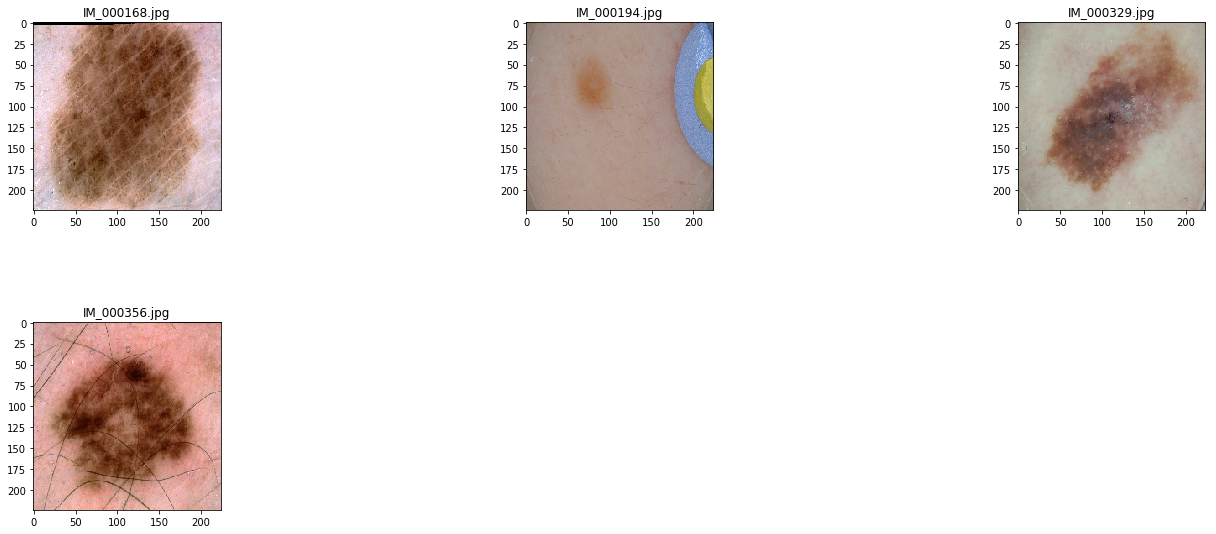

,ImageId,Malignant,True_label
0,IM_000168.jpg,1,1
1,IM_000194.jpg,0,0
2,IM_000329.jpg,1,0
3,IM_000356.jpg,1,0


In [0]:
# you can add your own images in the folder "example_data". 
print("See table below to know the wrongly classified images")
submit_test ( model, "example_data")